In [2]:
import seaborn as sns
from decouple import config
import pandas as pd
import matplotlib.pyplot as plt
import nilearn.image as img

In [48]:
task ='fear'
participant = 'G2142'
path = config(task)
confounds_df = pd.read_csv(f'{path}/preprocessed_t1/sub-{participant}/func/sub-{participant}_task-{task}_desc-confounds_timeseries.tsv', sep='\t').fillna(0)

In [49]:
regressors = confounds_df.filter(regex=("a_comp_cor.*")).to_dict(orient='series')
regressors.update([
        ('trans_x', confounds_df['trans_x']),
        ('trans_y', confounds_df['trans_y']),
        ('trans_z', confounds_df['trans_z']),
        ('rot_x', confounds_df['rot_x']),
        ('rot_y', confounds_df['rot_y']),
        ('rot_z', confounds_df['rot_z']),                   
        ('trans_x_derivative1', confounds_df['trans_x_derivative1']),
        ('trans_y_derivative1', confounds_df['trans_y_derivative1']),
        ('trans_z_derivative1', confounds_df['trans_z_derivative1']),
        ('rot_x_derivative1', confounds_df['rot_x_derivative1']),
        ('rot_y_derivative1', confounds_df['rot_y_derivative1']),
        ('rot_z_derivative1', confounds_df['rot_z_derivative1']), 
        ('trans_x_power2', confounds_df['trans_x_power2']),
        ('trans_y_power2', confounds_df['trans_y_power2']),
        ('trans_z_power2', confounds_df['trans_z_power2']),
        ('rot_x_power2', confounds_df['rot_x_power2']),
        ('rot_y_power2', confounds_df['rot_y_power2']),
        ('rot_z_power2', confounds_df['rot_z_power2']), 
        ('trans_x_derivative1_power2', confounds_df['trans_x_derivative1_power2']),
        ('trans_y_derivative1_power2', confounds_df['trans_y_derivative1_power2']),
        ('trans_z_derivative1_power2', confounds_df['trans_z_derivative1_power2']),
        ('rot_x_derivative1_power2', confounds_df['rot_x_derivative1_power2']),
        ('rot_y_derivative1_power2', confounds_df['rot_y_derivative1_power2']),
        ('rot_z_derivative1_power2', confounds_df['rot_z_derivative1_power2']),
        ])
regressors_df = pd.DataFrame(data=regressors)

<AxesSubplot: >

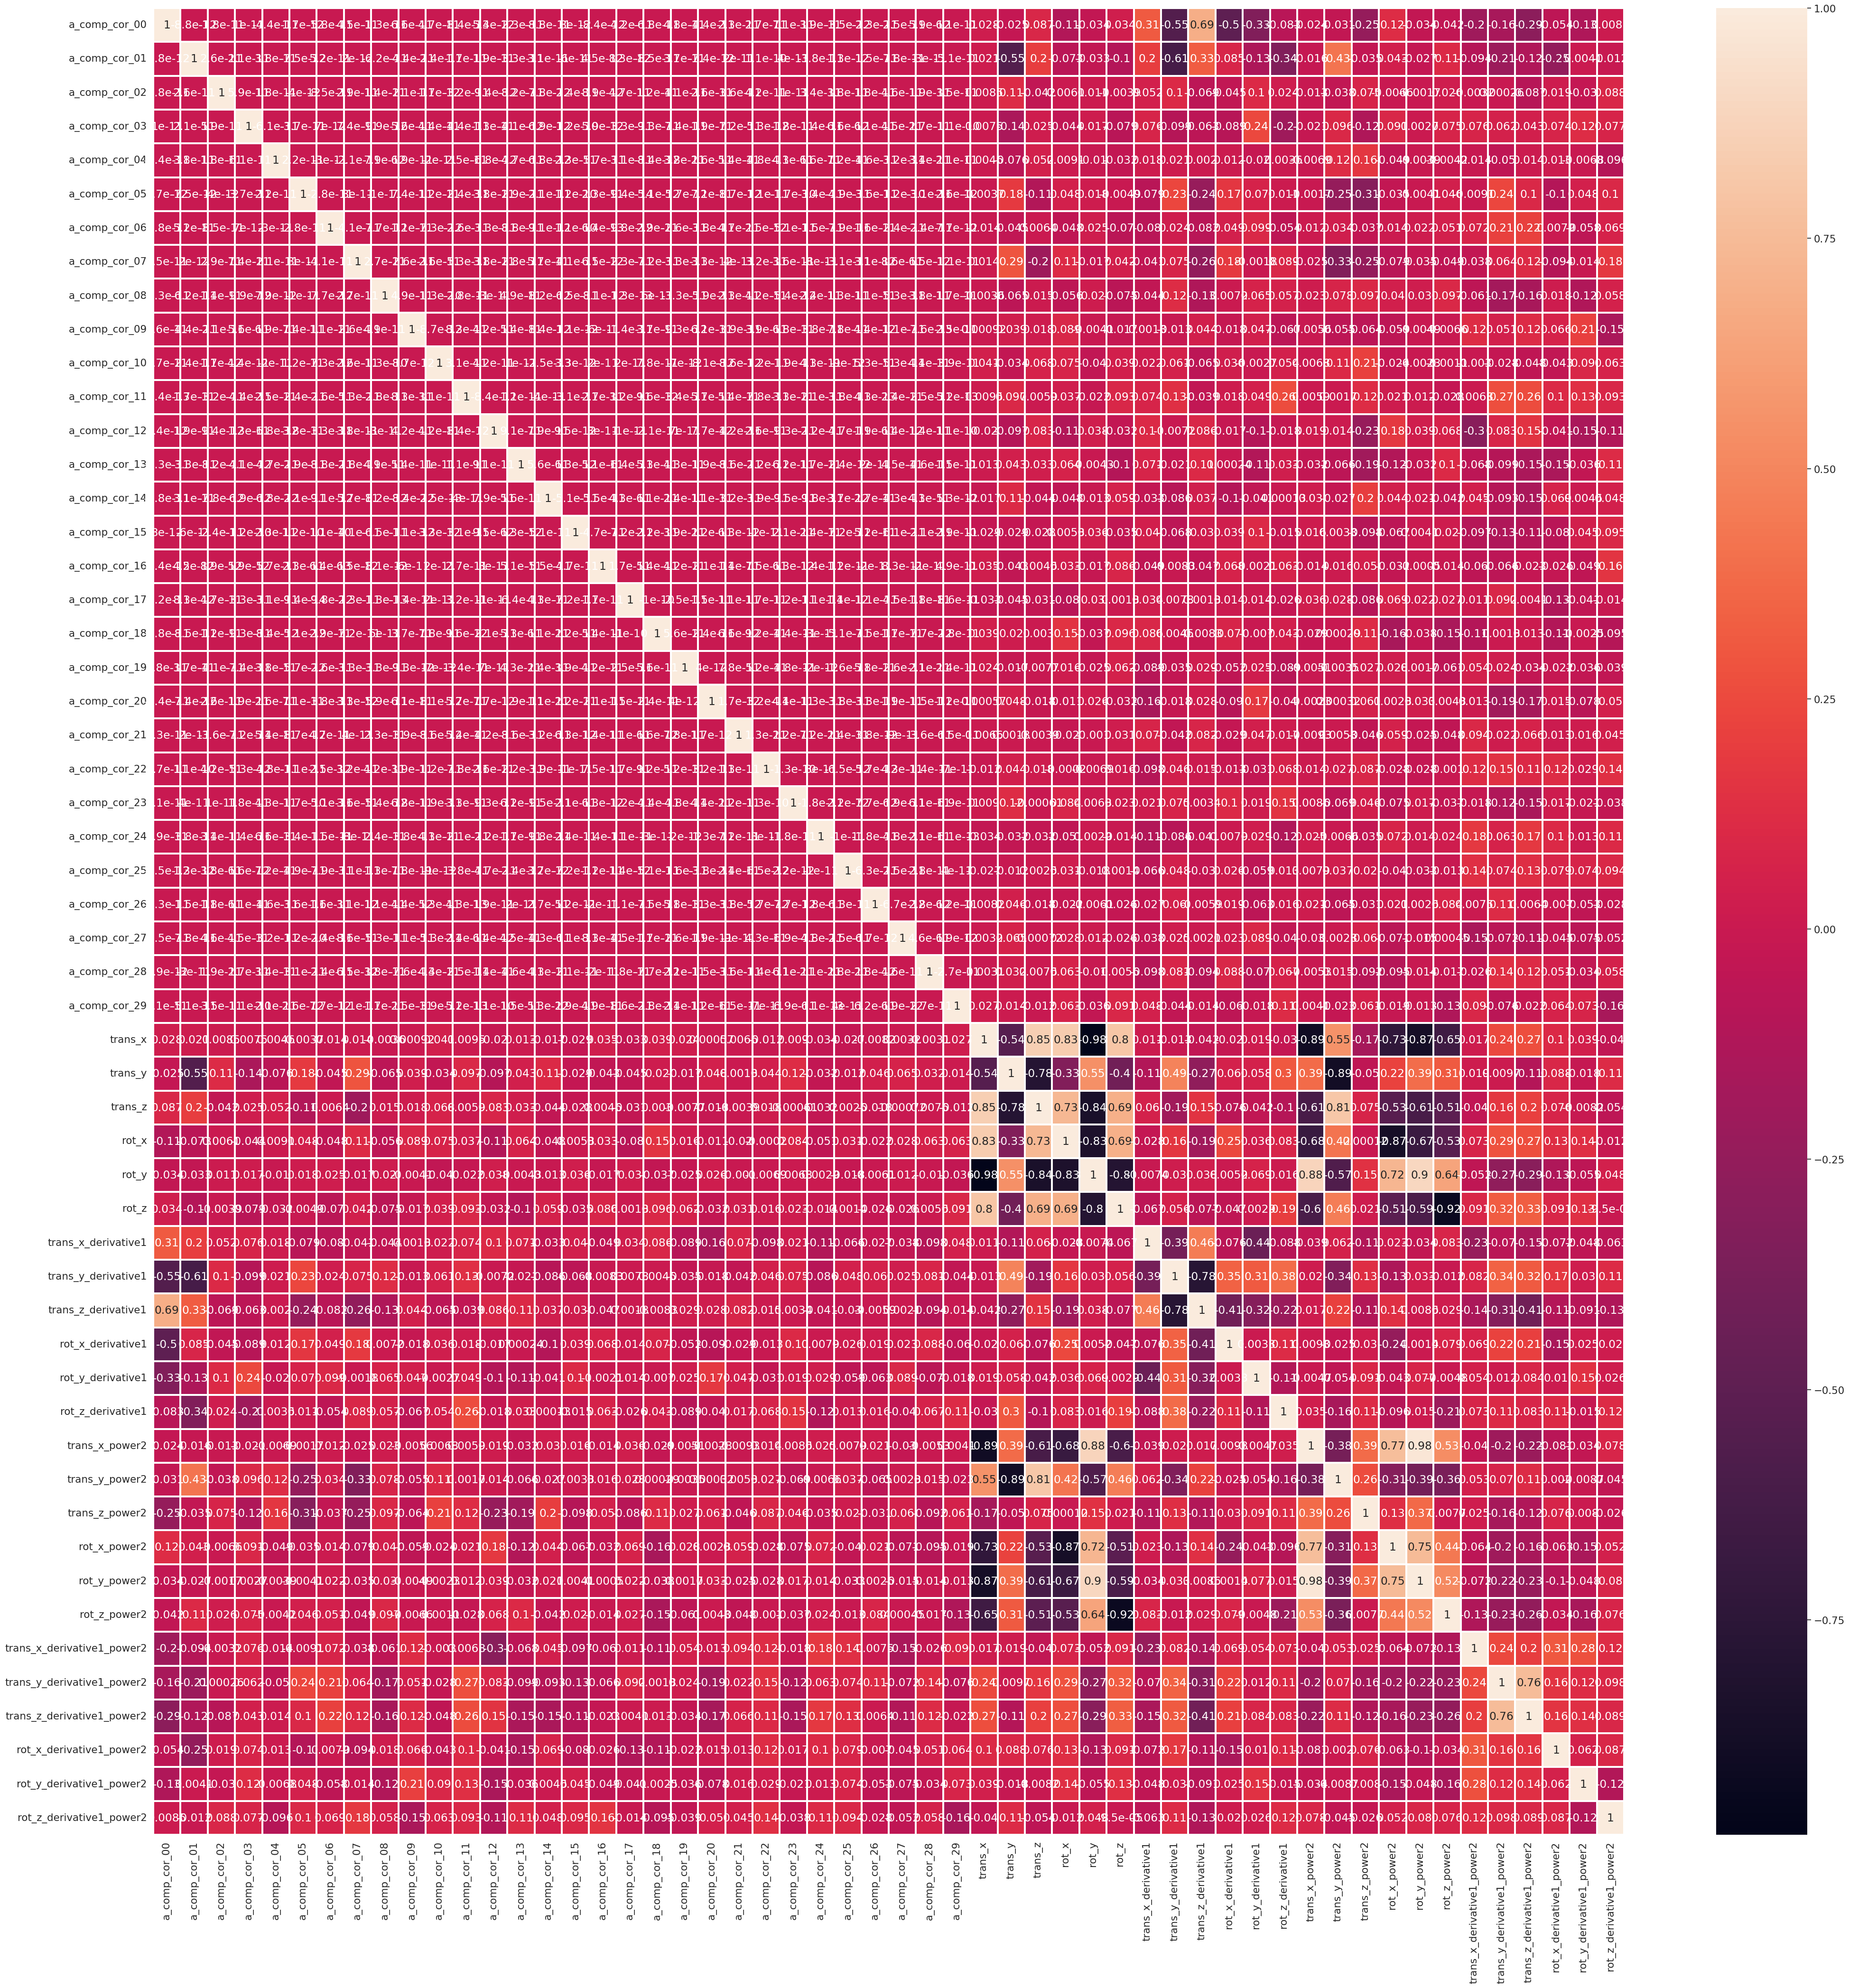

In [50]:
fig, ax = plt.subplots(figsize=(50,50)) 
sns.set(font_scale=1.4)
sns.heatmap(regressors_df.corr(), annot=True, ax=ax, linewidths=1.5)